In [4]:
census_data = {
     "age" : "http://webarchive.nationalarchives.gov.uk/20160105160709/http://www.ons.gov.uk/ons/rel/census/2011-census/key-statistics-for-local-authorities-in-england-and-wales/rft-table-ks102ew.xls",
     "education" : "http://webarchive.nationalarchives.gov.uk/20160105160709/http://www.ons.gov.uk/ons/rel/census/2011-census/key-statistics-for-local-authorities-in-england-and-wales/rft-table-ks501ew.xls",
     "economic" : "http://webarchive.nationalarchives.gov.uk/20160105160709/http://www.ons.gov.uk/ons/rel/census/2011-census/key-statistics-for-local-authorities-in-england-and-wales/rft-table-ks601ew.xls",
}

In [20]:
import pandas as pd

In [59]:
age = pd.read_excel(io=census_data["age"], sheetname="KS102EW_Numbers", header=10, parse_cols=("B,F:U"), skiprows=[11,12,13])
age["Total"] = age.sum(axis=1)
age.head(2)

,Area name,Age 0 to 4,Age 5 to 7,Age 8 to 9,Age 10 to 14,Age 15,Age 16 to 17,Age 18 to 19,Age 20 to 24,Age 25 to 29,Age 30 to 44,Age 45 to 59,Age 60 to 64,Age 65 to 74,Age 75 to 84,Age 85 to 89,Age 90 and over,Total
0,ENGLAND AND WALES,3496750.0,1927039.0,1208672.0,3258677.0,687994.0,1391235.0,1460156.0,3807245.0,3836609.0,11515165.0,10886135.0,3377162.0,4852833.0,3115552.0,825671.0,429017.0,56075912.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [61]:
age2 = age[(age['Area name'].notnull()) & (age['Total'] > 0) ][2:]
print(age2["Total"].sum())
age2[["Area name", "Total"]]



56075912.0


,Area name,Total
4,NORTH EAST,2596886.0
21,NORTH WEST,7052177.0
71,YORKSHIRE AND THE HUMBER,5283733.0
101,EAST MIDLANDS,4533222.0
154,WEST MIDLANDS,5601847.0
195,EAST,5846965.0
255,LONDON,8173941.0
294,SOUTH EAST,8634750.0
378,SOUTH WEST,5288935.0
426,WALES,3063456.0


In [51]:
%matplotlib inline

In [132]:
age3 = age2.copy()
age3.drop("Total", axis=1, inplace=True)
age3 = age3.iloc[:, [0,8,9,10,11]]
age3.head(2)

,Area name,Age 20 to 24,Age 25 to 29,Age 30 to 44,Age 45 to 59
4,NORTH EAST,184018.0,164303.0,491533.0,538344.0
21,NORTH WEST,489640.0,466582.0,1394536.0,1397119.0


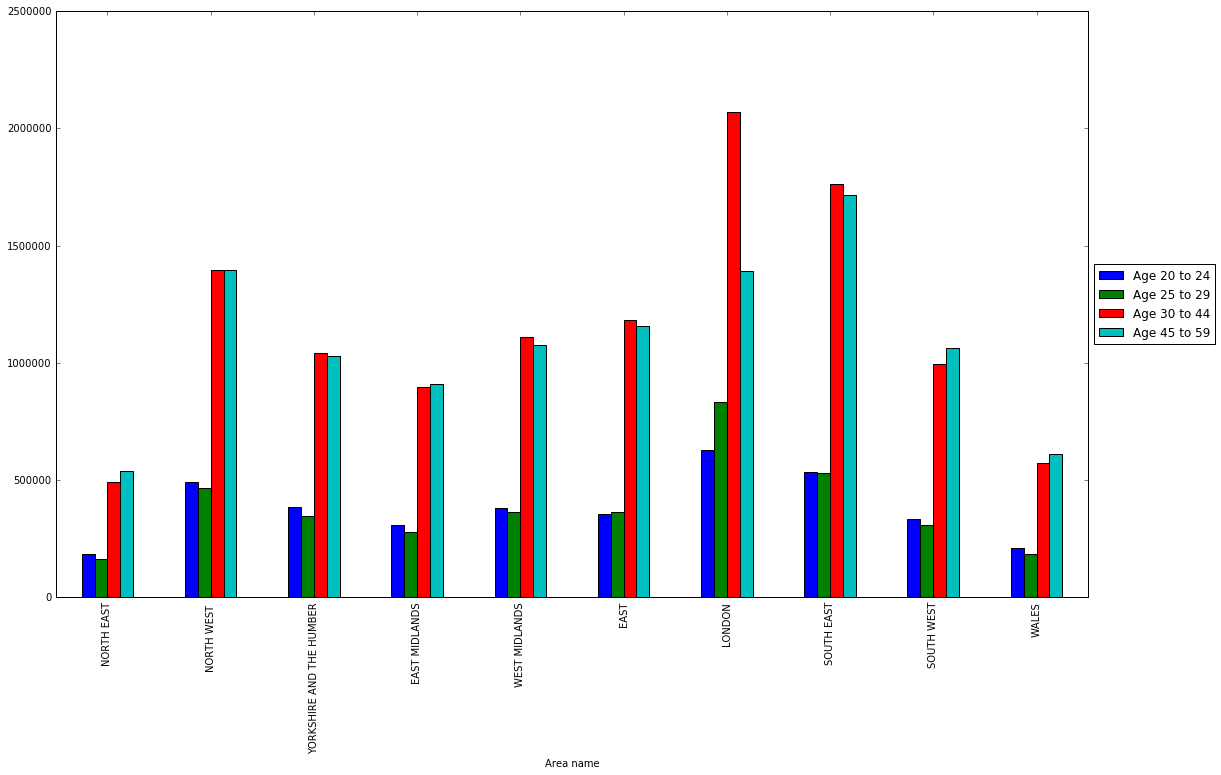

In [133]:
import matplotlib.pyplot as plt
plt1 = age3.plot(kind="bar", x="Area name")
plt1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [153]:
economic = pd.read_excel(io=census_data["economic"], sheetname="KS601EW_Numbers", header=10, parse_cols=("B,F:S"), skiprows=[11,12,13])

In [154]:
economic["Total"] = economic.sum(axis=1)
economic = economic[(economic['Area name'].notnull()) & (economic['Total'] > 0)][2:]
economic[["Area name", "Total"]]

,Area name,Total
4,NORTH EAST,2033730.0
21,NORTH WEST,5432991.0
71,YORKSHIRE AND THE HUMBER,4071584.0
101,EAST MIDLANDS,3479436.0
154,WEST MIDLANDS,4286322.0
195,EAST,4408098.0
255,LONDON,6431501.0
294,SOUTH EAST,6489236.0
378,SOUTH WEST,3980622.0
426,WALES,2346137.0


In [173]:
cols = [col for col in economic.columns if col in ("Area name", "Economically active: Unemployed", "Total")]
unemployed = economic.copy()[cols]
unemployed["perc"] = unemployed["Economically active: Unemployed"] / unemployed["Total"] * 100
unemployed.head()

,Area name,Economically active: Unemployed,Total,perc
4,NORTH EAST,103313.0,2033730.0,5.079976
21,NORTH WEST,242499.0,5432991.0,4.463453
71,YORKSHIRE AND THE HUMBER,187755.0,4071584.0,4.611350
101,EAST MIDLANDS,139295.0,3479436.0,4.003379
154,WEST MIDLANDS,207415.0,4286322.0,4.838997


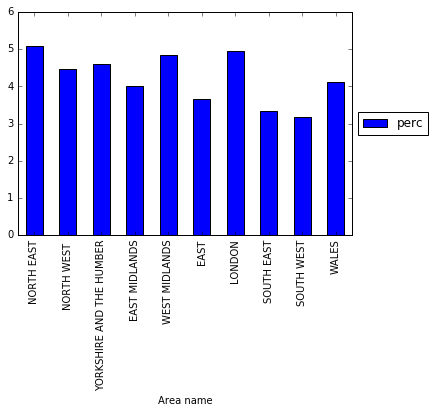

In [182]:
plt2 = unemployed[["Area name", "perc"]].plot(kind="bar", x="Area name")
plt2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [260]:
import numpy as np

In [261]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.head()

,a,b,c,d
0,0.481024,0.408977,0.148831,0.782276
1,0.731305,0.007039,0.454670,0.994613
2,0.688023,0.091648,0.415496,0.801549
3,0.627002,0.382374,0.625295,0.494691
4,0.800224,0.208399,0.914597,0.708405


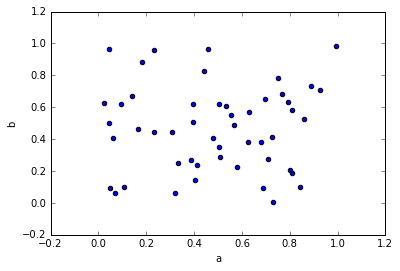

In [262]:
df.plot.scatter(x='a', y='b');

In [263]:
df = pd.read_csv("http://www.electoralcommission.org.uk/__data/assets/file/0014/212135/EU-referendum-result-data.csv", usecols=["Area_Code", "Remain", "Leave"] )

In [264]:
df.columns
df.head(2)

,Area_Code,Remain,Leave
0,E06000031,34176,53216
1,E06000032,36708,47773


In [316]:
edu = pd.read_excel(io=census_data["education"], sheetname="KS501EW_Numbers", header=10, parse_cols=("A,K"), skiprows=[11,12,13])
edu.dropna(how='all', inplace=True)
edu.rename(index=str, inplace=True, columns={"Area code": "are", "Highest level of qualification: Level 4 qualifications and above": "highedu"})
edu.head(5)

,are,highedu
1,K04000001,12383477.0
3,E92000001,11769361.0
5,E12000001,473382.0
7,E06000047,91249.0
8,E06000005,20244.0


In [319]:
#ax = df.plot.scatter(x='Remain', y='Leave', color='DarkBlue', label='Group 1');
#edu.plot.scatter(x='area', y='highedu', color='DarkGreen', label='Group 2', ax=ax);
#ax = edu.plot(kind='box', x='c', y='d')

In [320]:
inc_data = "http://webarchive.nationalarchives.gov.uk/20160105160709/http://www.ons.gov.uk/ons/rel/regional-trends/region-and-country-profiles/region-and-country-profiles---key-statistics-and-profiles--october-2013/regional-profiles---key-statistics--october-2013.xls"

In [334]:
inc = pd.read_excel(io=inc_data, sheetname="5", header=2, parse_cols=("C,H"), skiprows=[3,4,5,6,7,8,9,10])
inc.dropna(how='all', inplace=True)
inc.rename(index=str, inplace=True, columns={"Region": "region", "Gross disposable\nhousehold income4\nper head, \n20112 \n(£) ": "income"})
inc

,region,income
0,North East,13560.0
1,North West,14476.0
2,Yorkshire and The Humber,13819.0
3,East Midlands,14561.0
4,West Midlands,14362.0
5,East,16608.0
6,London,20509.0
7,South East,18087.0
8,South West,16014.0


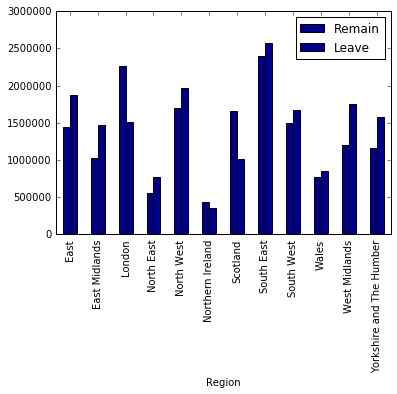

In [360]:
#ax = inc.plot(kind="bar", x="region", color='DarkGreen', label='Income')

df = pd.read_csv("http://www.electoralcommission.org.uk/__data/assets/file/0014/212135/EU-referendum-result-data.csv", usecols=["Region", "Remain", "Leave"] )
df = df.groupby("Region").sum()
df.head()
df.plot(kind="bar", color='DarkBlue', label='vote'); # ax=ax

In [362]:
df = pd.read_csv("http://www.electoralcommission.org.uk/__data/assets/file/0014/212135/EU-referendum-result-data.csv", usecols=["Region", "Remain", "Leave"] )

dfr = df.groupby("Region").sum()

In [363]:
# ok next time I should probably wrap this in a method
dfr["Perc_leave"] = dfr["Leave"] / (dfr["Remain"] + dfr["Leave"]) * 100
dfr["Perc_remain"] = dfr["Remain"] / (dfr["Remain"] + dfr["Leave"]) * 100

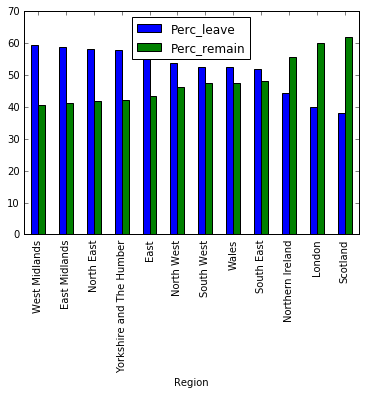

In [379]:
ax = dfr[["Perc_leave", "Perc_remain"]].sort_values(by="Perc_leave", ascending=False).plot(kind="bar")

In [365]:
inc

,region,income
0,North East,13560.0
1,North West,14476.0
2,Yorkshire and The Humber,13819.0
3,East Midlands,14561.0
4,West Midlands,14362.0
5,East,16608.0
6,London,20509.0
7,South East,18087.0
8,South West,16014.0


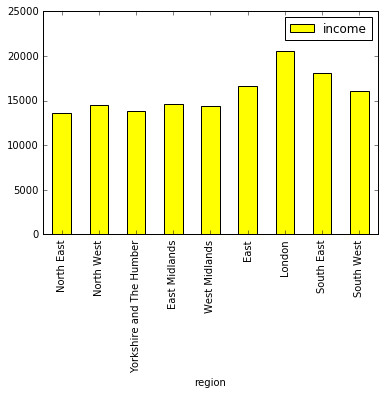

In [381]:
inc.plot(kind="bar", x="region", color='Yellow', label='Income')